In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("./datasets/person_2018-19/person_2018.csv")

In [21]:
grps = df.groupby(by=['PERSON_TYPE', 'PED_ROLE']).count()
grps

Unnamed: 0  UNIQUE_ID  COLLISION_ID  CRASH_DATE  \
PERSON_TYPE PED_ROLE                                                           
Bicyclist   Driver                 1584       1584          1584        1584   
            Passenger                21         21            21          21   
Occupant    Driver                94228      94228         94228       94228   
            In-Line Skater           14         14            14          14   
            Notified Person         247        247           247         247   
            Other                    55         55            55          55   
            Owner                   878        878           878         878   
            Passenger             36777      36777         36777       36777   
            Registrant           106568     106568        106568      106568   
            Witness                3098       3098          3098        3098   
Pedestrian  Pedestrian             3402       3402          3402        3402   

                             CRASH_TIME  PERSON_ID  PERSON_INJURY  VEHICLE_ID  \
PERSON_TYPE PED_ROLE                                                            
Bicyclist   Driver                 1584       1584           1584        1584   
            Passenger                21         21             21          21   
Occupant    Driver                94228      94226          94228       94219   
            In-Line Skater           14         14             14           0   
            Notified Person         247        247            247           0   
            Other                    55         55             55           0   
            Owner                   878        878            878         878   
            Passenger             36777      36777          36777       36773   
            Registrant           106568     106568         106568      106560   
            Witness                3098       3098           3098           0   
Pedestrian  Pedestrian             3402       3401           3402           0   

                             PERSON_AGE  EJECTION  EMOTIONAL_STATUS  \
PERSON_TYPE PED_ROLE                                                  
Bicyclist   Driver                 1581      1584              1584   
            Passenger                21        21                21   
Occupant    Driver                94192     94221             94222   
            In-Line Skater           14         9                14   
            Notified Person           0         0                 0   
            Other                    50        25                47   
            Owner                     0         0                 0   
            Passenger             36774     36777             36777   
            Registrant            97912         0                 0   
            Witness                   0         0                 0   
Pedestrian  Pedestrian             3395       113              3397   

                             BODILY_INJURY  POSITION_IN_VEHICLE  \
PERSON_TYPE PED_ROLE                                              
Bicyclist   Driver                    1584                 1584   
            Passenger                   21                   21   
Occupant    Driver                   94221                94221   
            In-Line Skater              14                    9   
            Notified Person              0                    0   
            Other                       48                   23   
            Owner                        0                    0   
            Passenger                36776                36777   
            Registrant                   0                    0   
            Witness                      0                    0   
Pedestrian  Pedestrian                3400                  124   

                             SAFETY_EQUIPMENT  PED_LOCATION  PED_ACTION  \
PERSON_TYPE PED_ROLE                                           

In [4]:
datasets = []
for i in range(2013, 2024):

    year_range = f"{(i//2)*2}-{(i//2)*2+ -1999}"
    file = f"./datasets/person_{year_range}/person_{i}.csv"
    result = pd.read_csv(file)
    datasets.append(result)

In [34]:
plt.rcParams['figure.figsize'] = (40,20)

def getPlots(datasets, start, row, col, gender):
    
    for i in range(0, len(datasets)):
        result = datasets[i]
        result["CRASH_DATE"] = pd.to_datetime(result["CRASH_DATE"])
        result["ACCIDENT_MONTH"] = result["CRASH_DATE"].dt.month

        result_grped = result.groupby('ACCIDENT_MONTH').count()['CRASH_DATE']
        dummy_series = pd.Series(0, index=range(1,13))
        result_grped = result_grped.add(dummy_series, fill_value = 0)

        plt.subplot(row,col,i+1)
        result_grped.plot.bar()
        plt.title(f"Number of {gender} involved in accidents per month in {i+start}")
        plt.ylabel("People")
        
    plt.show()

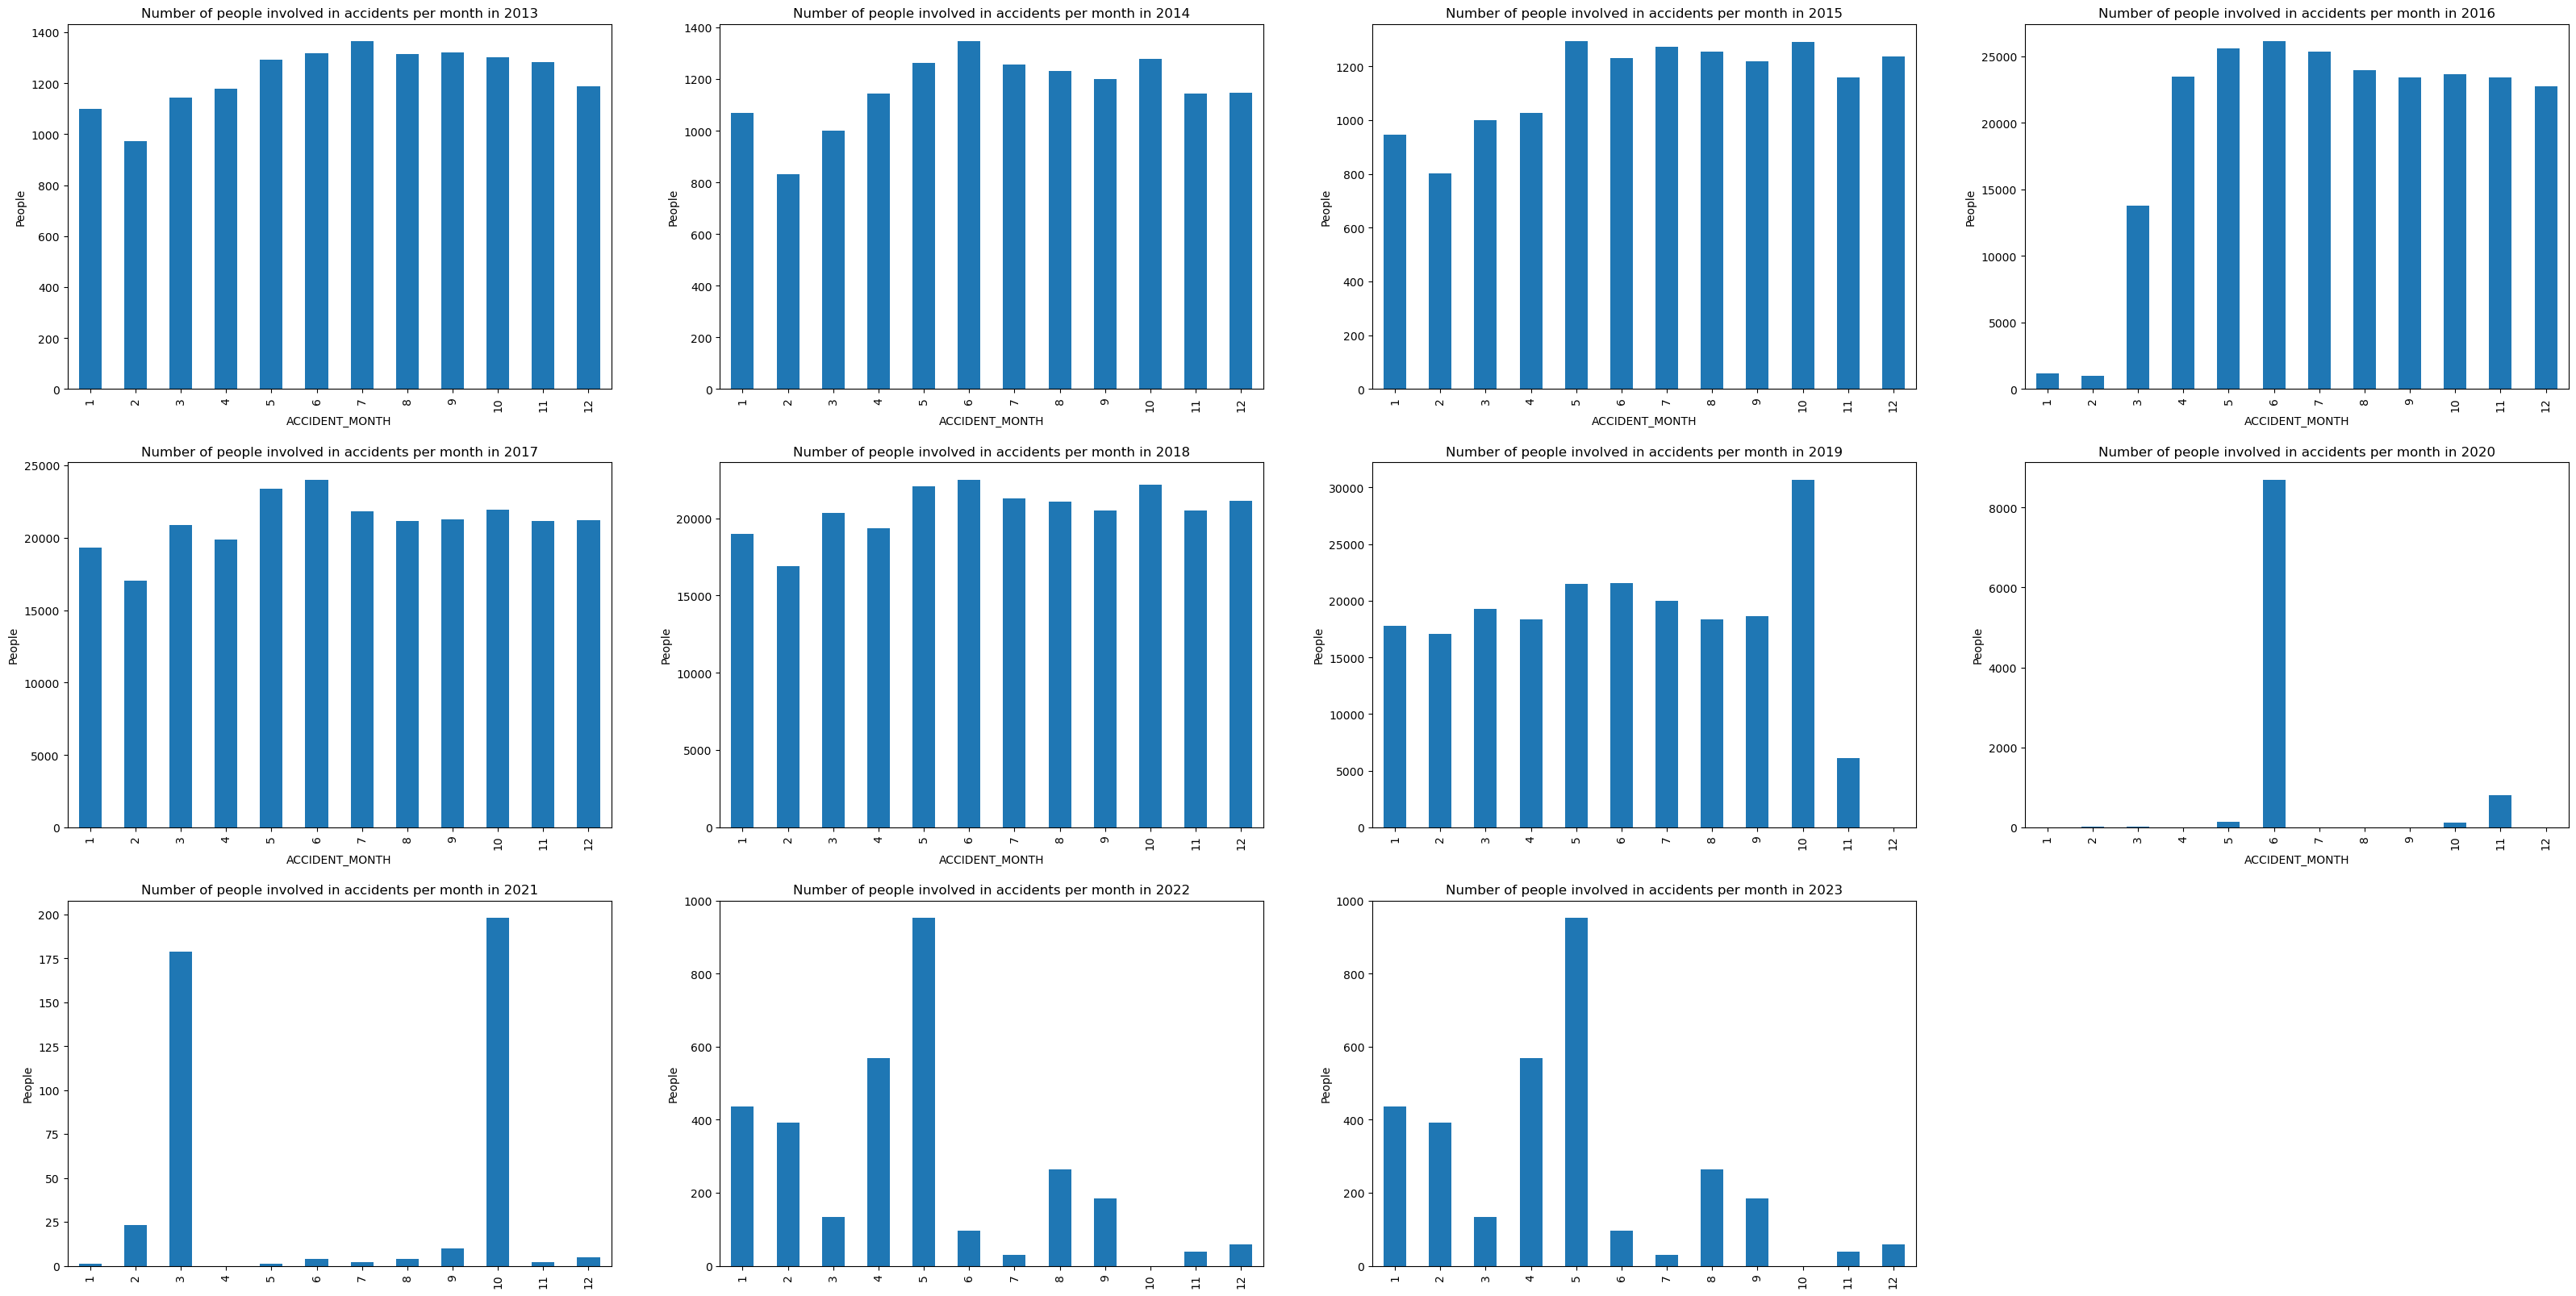

In [30]:
getPlots(datasets, 2013, 3, 4, "people")

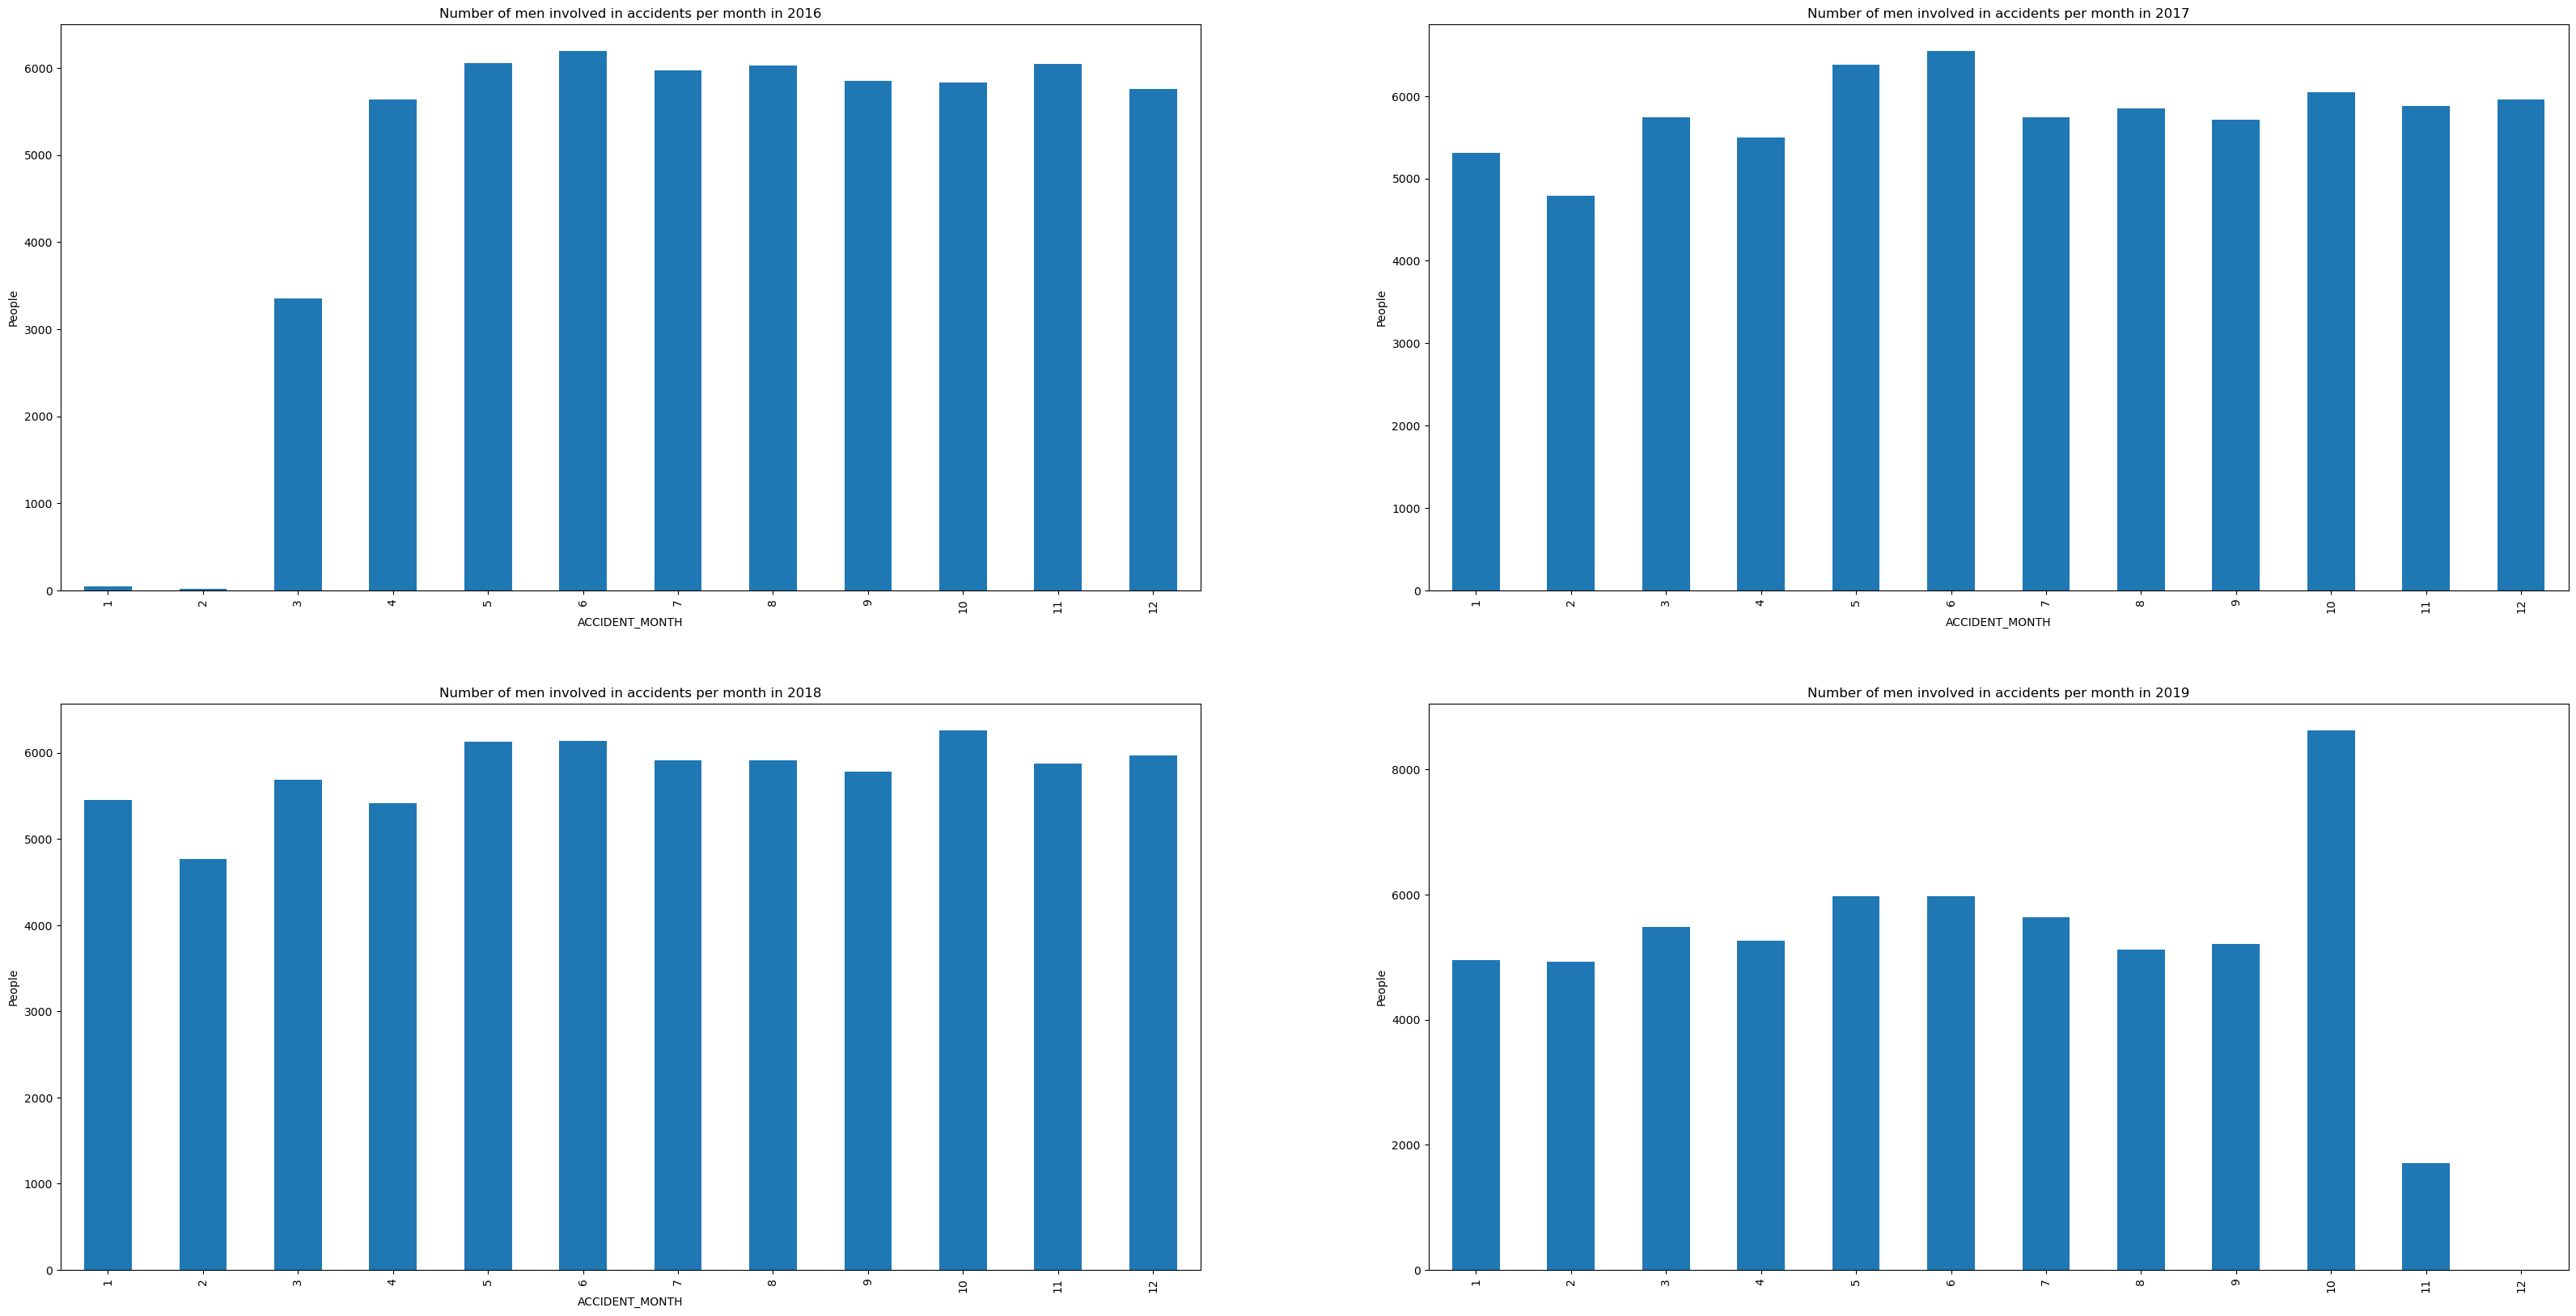

In [35]:
datasets_temp = []

for i in range(2016, 2020):
    datasets_temp.append(datasets[i-2013][(datasets[i-2013]['PERSON_TYPE'] == 'Occupant') & (datasets[i-2013]['PED_ROLE'] == 'Driver') & (datasets[i-2013]['PERSON_SEX'] == 'M')])

getPlots(datasets_temp, 2016, 2, 2, "men")

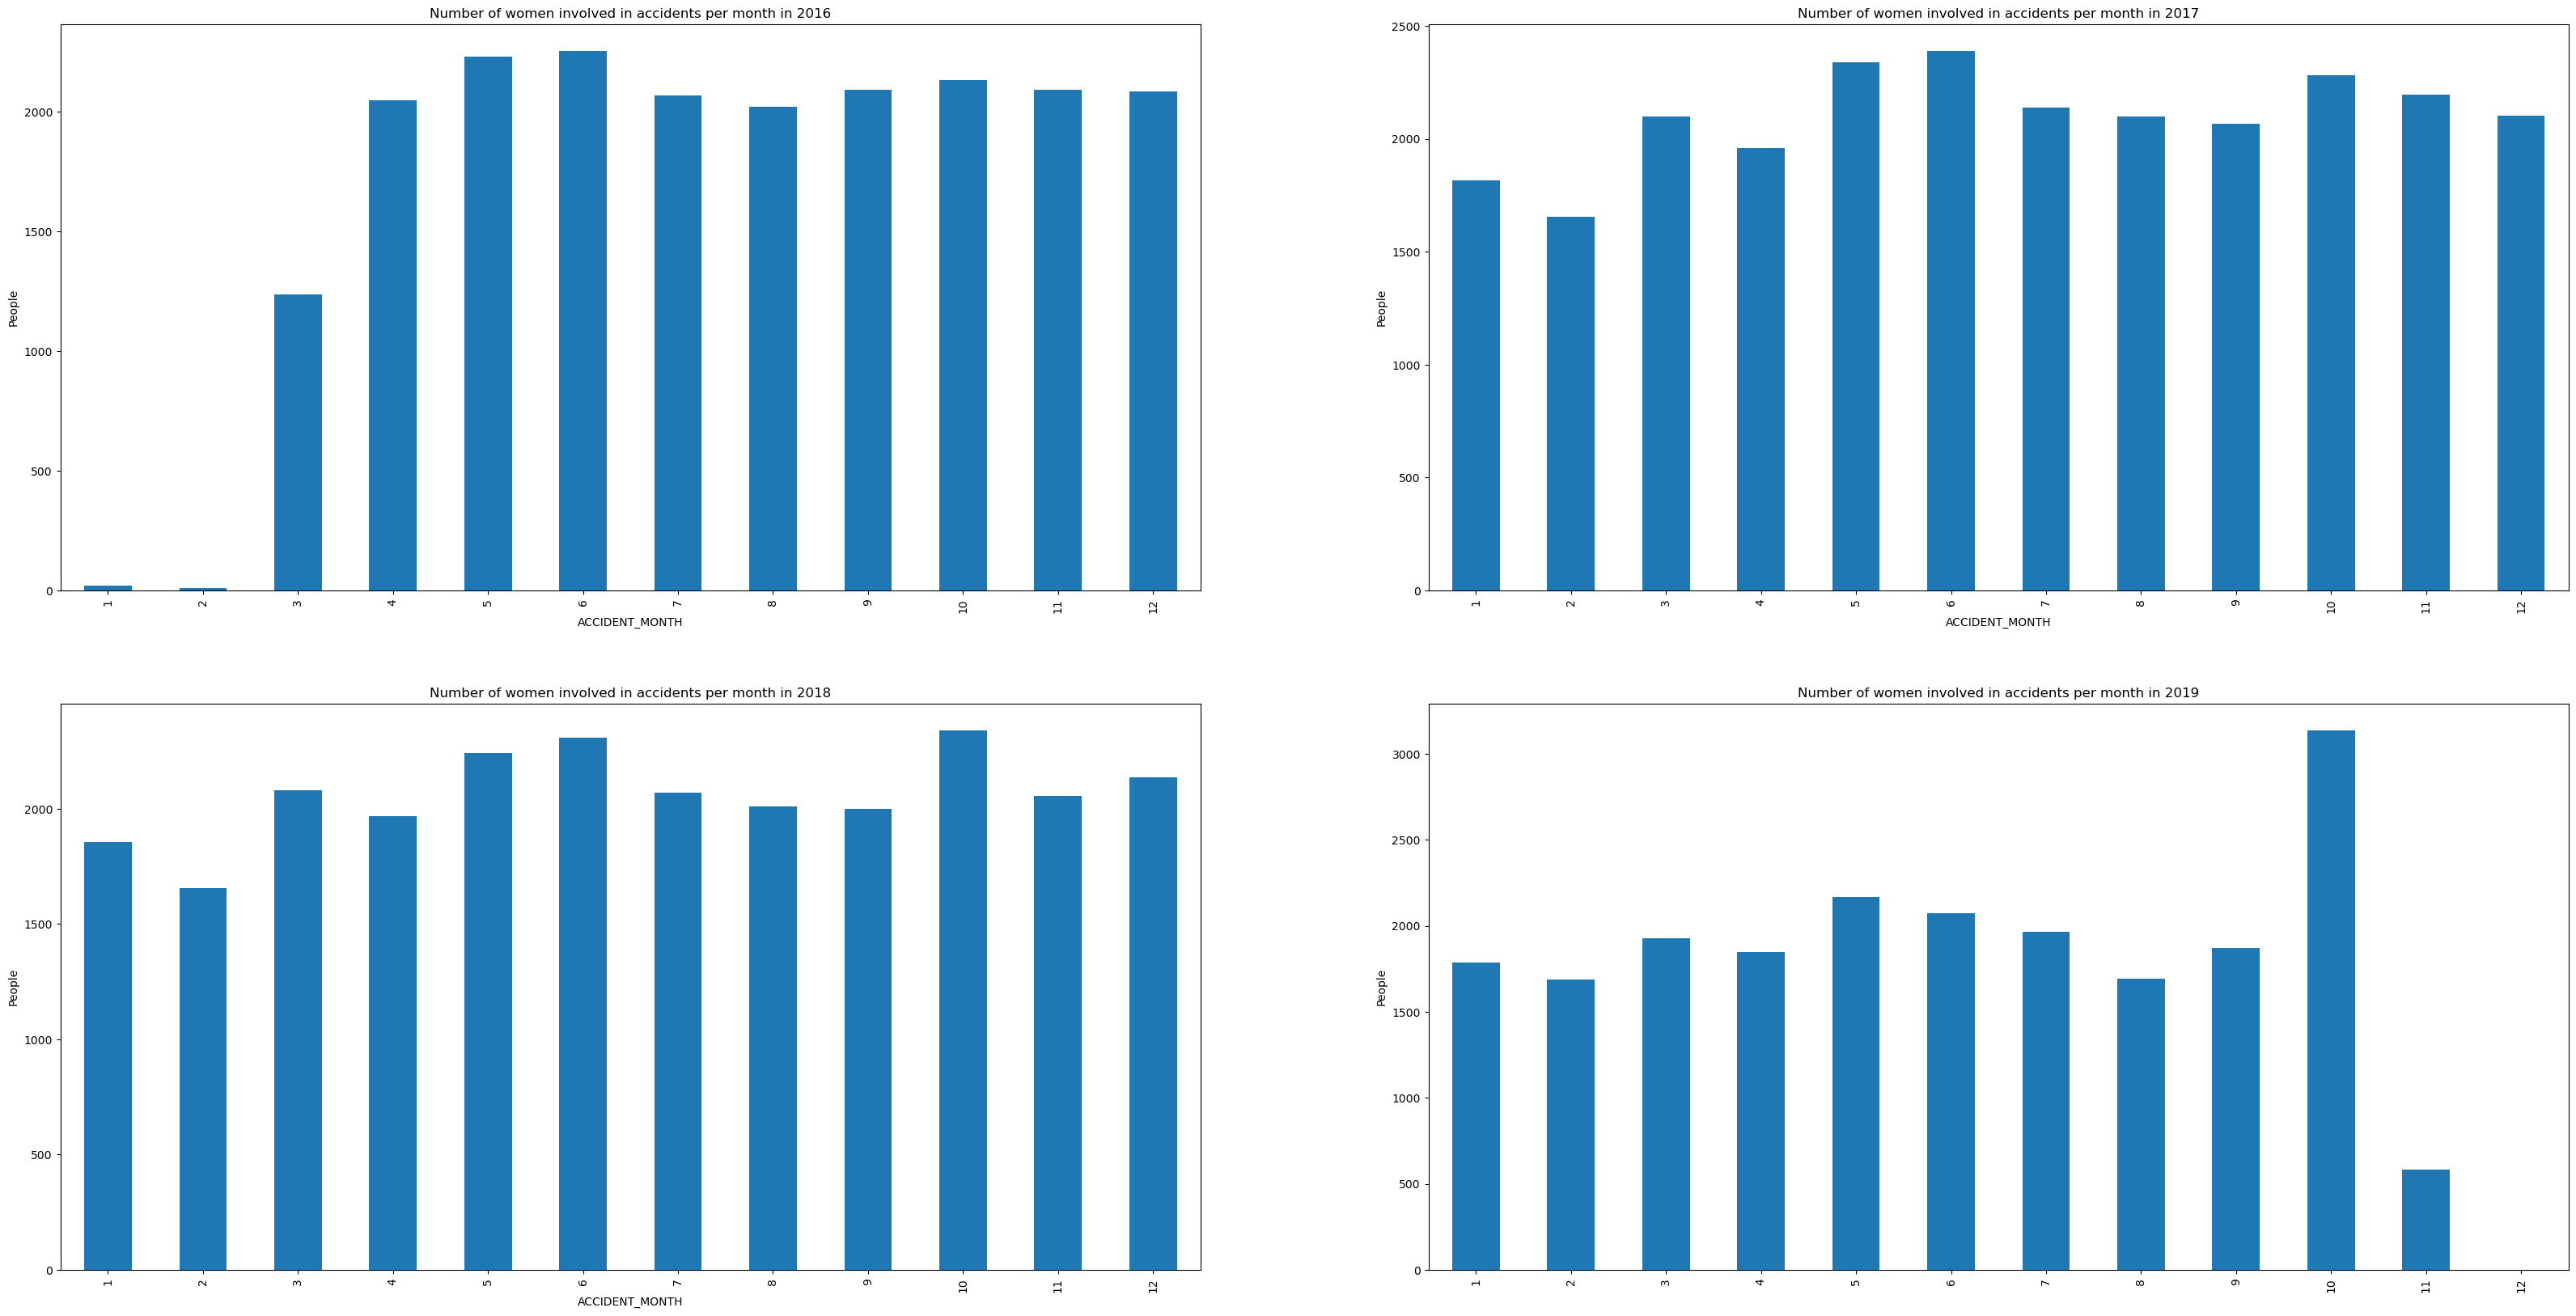

In [36]:
datasets_temp = []

for i in range(2016, 2020):
    datasets_temp.append(datasets[i-2013][(datasets[i-2013]['PERSON_TYPE'] == 'Occupant') & (datasets[i-2013]['PED_ROLE'] == 'Driver') & (datasets[i-2013]['PERSON_SEX'] == 'F')])

getPlots(datasets_temp, 2016, 2, 2, "women")